In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

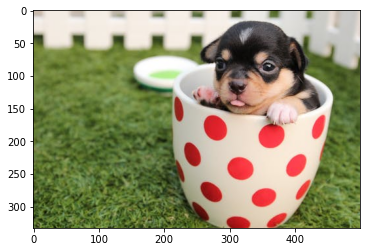

In [2]:
#load the image with opencv
img = cv2.imread('chihuahua-dog-puppy-cute-39317_small.jpeg')
#show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.show()

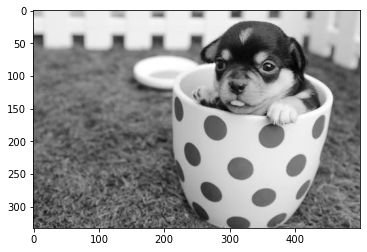

In [3]:
#1-convert grayscale
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray') #show the grayscale image
plt.show()

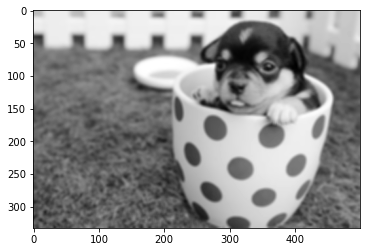

In [4]:
#2-gaussian filter for smoothing
g=cv2.GaussianBlur(img_gray,(5,5),cv2.BORDER_DEFAULT) 
plt.imshow(g,cmap='gray') 
plt.show()

In [5]:
#3-x ang y gradients with sobel filter
x_grad = cv2.Sobel(g,cv2.CV_64F,1,0,ksize=5)
y_grad = cv2.Sobel(g,cv2.CV_64F,0,1,ksize=5)

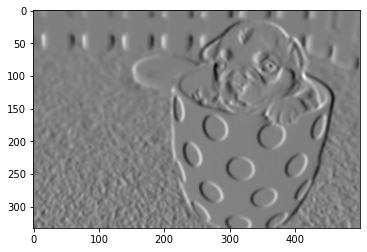

In [6]:
#show x gradient
plt.imshow(x_grad,cmap='gray') 
plt.show()

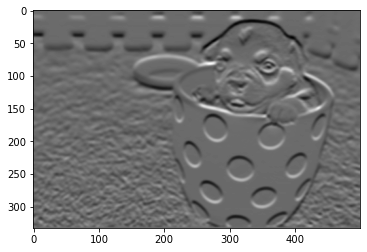

In [7]:
#show y gradient
plt.imshow(y_grad,cmap='gray') 
plt.show()

In [8]:
G= np.sqrt(np.square(x_grad)+np.square(y_grad)) #calculate with formula
G *= 255.0 / G.max()

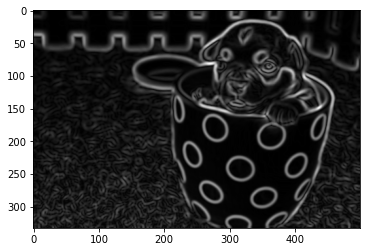

In [9]:
#show G
plt.imshow(G,cmap='gray') 
plt.show()

In [10]:
#angle calculation formula arctan()
angle=np.arctan2(y_grad,x_grad)
# radyan to degree convert
angle=np.rad2deg(angle)

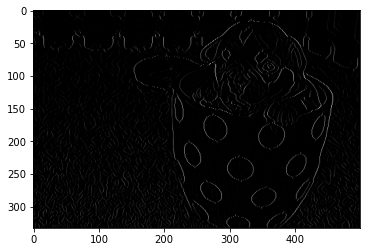

In [11]:
#4-non-maximum suppression to get rid of unnecessary edges
#0-45-90-135
nms=np.zeros(G.shape)
for each in range(1,G.shape[0]-1):
    for x in range(1,G.shape[1]-1): # for all pixels
        if (angle[each,x]>=0) or (angle[each,x]<22.5) or (angle[each,x]>=157.5) or (angle[each,x]<=180):
            control=G[each,x-1]
            if control< G[each,x+1]: 
                control=G[each,x+1] #control is bigger one
            if control <= G[each,x]: #Pixels bigger than their neighbors should be taken
                nms[each,x]=G[each,x]
        elif (angle[each,x]>=22.5) or (angle[each,x]<67.5):
            control=G[each-1,x-1]
            if control< G[each+1,x+1]:
                control=G[each+1,x+1]
            if control <= G[each,x]:  #Pixels bigger than their neighbors should be taken
                nms[each,x]=G[each,x]
        elif (angle[each,x]>=67.5) or (angle[each,x]<112.5):
            control=G[each-1,x]
            if control< G[each+1,x]:
                control=G[each+1,x]
            if control <= G[each,x]:  #Pixels bigger than their neighbors should be taken
                nms[each,x]=G[each,x]
        else:
            control=G[each+1,x-1]
            if control< G[each-1,x+1]:
                control=G[each-1,x+1]
            if control <= G[each,x]:  #Pixels bigger than their neighbors should be taken
                nms[each,x]=G[each,x]
                
nms*= 255.0 / nms.max()        
#show nms
plt.imshow(nms,cmap='gray') 
plt.show()

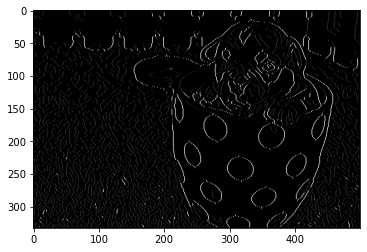

In [12]:
#5 double threshold to determine potential edges

high_threshold_value=70
low_threshold_value=10
# zero matrix with shape nms for result
dt=np.zeros(nms.shape)

biggerx,biggery= np.where(nms>= high_threshold_value) # biger from high_threshold_value
lowesx,lowesty= np.where((nms<=high_threshold_value)& (nms>=low_threshold_value)) #higher from low_threshold_value and lower from high_threshold_value
                         
dt[biggerx,biggery]=255
dt[lowesx,lowesty]=60

plt.imshow(dt,cmap='gray') 
plt.show()

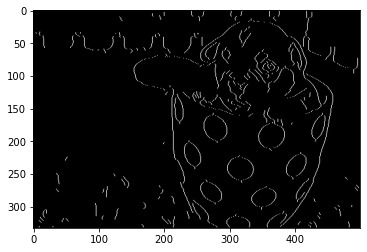

In [13]:
#Track edge by hysteresis
#If there is a strong pixel around a pixel, it is made strong.

for each in range(1,dt.shape[0]-1):
    for x in range(1,dt.shape[1]-1): # for all pixels
        if dt[each,x]==60: #it it is weak and have strong neighbor
            if((dt[each,x+1]==255) or (dt[each+1,x+1]==255) or (dt[each+1,x]==255) or (dt[each-1,x+1]==255) or (dt[each-1,x-1]==255) or (dt[each-1,x]==255) or (dt[each,x-1]==255) or (dt[each+1,x-1]==255) ):
                dt[each,x]=255 #make strong
            else:
                dt[each,x]=0
                
plt.imshow(dt,cmap='gray') 
plt.show()